<a href="https://colab.research.google.com/github/Darshan0902/2024-MACHINE-LEARNING-.-/blob/K3%7CCo-relation-using-Time-Series/_N2__Titans_in_graphs__Exploring_the_Time_Series___Version_13_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **Hello! I'm Darshan D. Prabhu,**

---

 A  Data Scientist passionate about leveraging data-driven insights to solve real-world problems. With a background in Artificial Intelligence and Machine Learning, I specialize in Data Science and Data driven projects.


*Let's connect and explore opportunities together:*

---

## Professional Contacts 🦅

[![Follow on GitHub](https://img.shields.io/badge/Follow%20on%20GitHub-%23FF4500?style=flat&logo=github&logoColor=black)](https://github.com/Darshan0902)  Connect with me on GitHub

[![Follow on Medium](https://img.shields.io/badge/Follow%20on%20Medium-%23FF4500?style=flat&logo=medium&logoColor=white)](https://prabhudarshan09.medium.com/) Follow my Medium articles

[![LinkedIn](https://img.shields.io/badge/Connect%20on%20LinkedIn-%23FF4500?style=flat&logo=linkedin&logoColor=white)](https://linkedin.com/in/darshanprabhu009/) Connect with me on LinkedIn

---

Feel free to reach out for collaborations, discussions, or suggestions ✔


# TABLE OF CONTENTS.
  
* THEORY
    
* 1 - IMPORTING LIBRARIES.
    
* 2 - DATA COLLECTION.
    
* 3 - EXPLORATORY DATA ANALYSIS.
    
* 4 - DATA PREPARATION.
    
* 5 - DATA VISUALIZATION.
  
* 6 - GOOGLE STOCK ANALYSIS.
    * CLOSING PRICE ON MONTHLY BASIS.
    
    
* 7 - AUTO CO-RELATION BETWEEN ALL THE STOCKS.
    
* 8 - CONCLUSION.

## THEORY .

 # <span style="color: BROWN;"> 1 - Time series analysis </span>


- Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time. In time series analysis, analysts record data points at consistent intervals over a set period of time rather than just recording the data points intermittently or randomly. However, this type of analysis is not merely the act of collecting data over time.

- What sets time series data apart from other data is that the analysis can show how variables change over time. In other words, time is a crucial variable because it shows how the data adjusts over the course of the data points as well as the final results. It provides an additional source of information and a set order of dependencies between the data.

- Time series analysis typically requires a large number of data points to ensure consistency and reliability. An extensive data set ensures you have a representative sample size and that analysis can cut through noisy data. It also ensures that any trends or patterns discovered are not outliers and can account for seasonal variance. Additionally, time series data can be used for forecasting—predicting future data based on historical data.

# <span style="color: BROWN;"> 2- AUTO CORELATION : </span>

* Autocorrelation, sometimes known as serial correlation in the discrete time case, is the correlation of a signal with a delayed copy of itself as a function of delay. Informally, it is the similarity between observations of a random variable as a function of the time lag between them. The analysis of autocorrelation is a mathematical tool for finding repeating patterns, such as the presence of a periodic signal obscured by noise, or identifying the missing fundamental frequency in a signal implied by its harmonic frequencies. It is often used in signal processing for analyzing functions or series of values, such as time domain signals.

* Different fields of study define autocorrelation differently, and not all of these definitions are equivalent. In some fields, the term is used interchangeably with autocovariance.

* Unit root processes, trend-stationary processes, autoregressive processes, and moving average processes are specific forms of processes with autocorrelation.

### <a id="1"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 1 - IMPORTING LIBRARIES . <br><div>  

In [ ]:
# For data manupilation use pandas.
import pandas as pd

# For Arrays and other data structures use numpy.
import numpy as np

# For visualizations use Matplotlib.
import matplotlib.pyplot as plt

# For visualizations as well.
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

### <a id="2"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 2 - DATA COLLECTION. <br><div>  

In [ ]:
path='/content/Da'
# combining all the datasets into one list .

# Defining the "company_list" as the list containing all the files.
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

In [ ]:
# Define a blank dataframe
all_data = pd.DataFrame()

# Using a for loop to read all files into the "current_df".
for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])


# Checking the data :
all_data

,date,open,high,low,close,volume,Name
0,2/8/2013,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2/11/2013,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2/12/2013,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2/13/2013,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2/14/2013,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2/1/2018,1445.0000,1459.8800,1385.1400,1390.0000,9113808,AMZN
1255,2/2/2018,1477.3900,1498.0000,1414.0000,1429.9500,11125722,AMZN
1256,2/5/2018,1402.6200,1458.9800,1320.7200,1390.0000,11494985,AMZN
1257,2/6/2018,1361.4600,1443.9900,1351.7900,1442.8400,11066819,AMZN


### <a id="3"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 3 - EXPLORATORY DATA ANALYSIS. <br><div>  


![image.png](attachment:3e3673c3-2730-465e-8a83-adef152b943d.png)

Seeking help of Dora the explorer here .

## <span style="color: #FF4500;"> 3.1 -  Shape is used to retrieve the number of columns and rows in the dataframe.


In [ ]:
all_data.shape

(4752, 7)

## <span style="color: #FF4500;"> 3.2 -  Head is used to retrieve the first five rows in the dataframe.


In [ ]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2/11/2013,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2/12/2013,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2/13/2013,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2/14/2013,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


## <span style="color: #FF4500;"> 3.3 -  dtypes is used to retrieve the type of data in each columns .

In [ ]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

## <span style="color: #FF4500;"> 3.4 -  tail is used to retrieve the last five rows of dataframe .

In [ ]:
all_data.tail()

,date,open,high,low,close,volume,Name
1254,2/1/2018,1445.00,1459.88,1385.14,1390.00,9113808,AMZN
1255,2/2/2018,1477.39,1498.00,1414.00,1429.95,11125722,AMZN
1256,2/5/2018,1402.62,1458.98,1320.72,1390.00,11494985,AMZN
1257,2/6/2018,1361.46,1443.99,1351.79,1442.84,11066819,AMZN
1258,2/7/2018,1449.00,1460.99,1415.15,1416.78,7162741,AMZN


## <span style="color: #FF4500;"> 3.5 -  .isnull is used to retrieve the missing values ( FALSE = values are not missing , TRUE = values are missing).

In [ ]:
all_data.isnull()

,date,open,high,low,close,volume,Name
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1254,False,False,False,False,False,False,False
1255,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False
1257,False,False,False,False,False,False,False


## <span style="color: #FF4500;"> 3.6 -  dtypes is used to retrieve the number of unique values in each columns .

In [ ]:
all_data.nunique()

date      1259
open      4431
high      4459
low       4470
close     4472
volume    4752
Name         4
dtype: int64

### <a id="4"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 4 - DATA PREPARATION . <br><div>  


In [ ]:
#converting the data to proper date and time format using to_datetime function.
all_data['date'] == pd.to_datetime(all_data["date"])

0       True
1       True
2       True
3       True
4       True
        ... 
1254    True
1255    True
1256    True
1257    True
1258    True
Name: date, Length: 4752, dtype: bool

In [ ]:
#verifying values
all_data.date[0]

0     2/8/2013
0    3/27/2014
0     2/8/2013
0     2/8/2013
Name: date, dtype: object

In [ ]:
#printing all the column headers.
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

### <a id="5"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 5 - DATA VISUALIZATION. <br><div>  

(array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

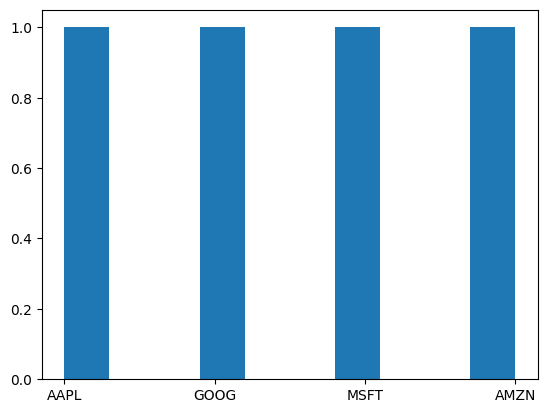

In [ ]:
#retrieving all unique name of stocks into a array "tech_list".
tech_list = all_data['Name'].unique()
plt.hist(tech_list)

## <span style="color: #FF4500;"> 5.2 - Plotting the "Opening prices" and "Closing price" of stocks.
</span>

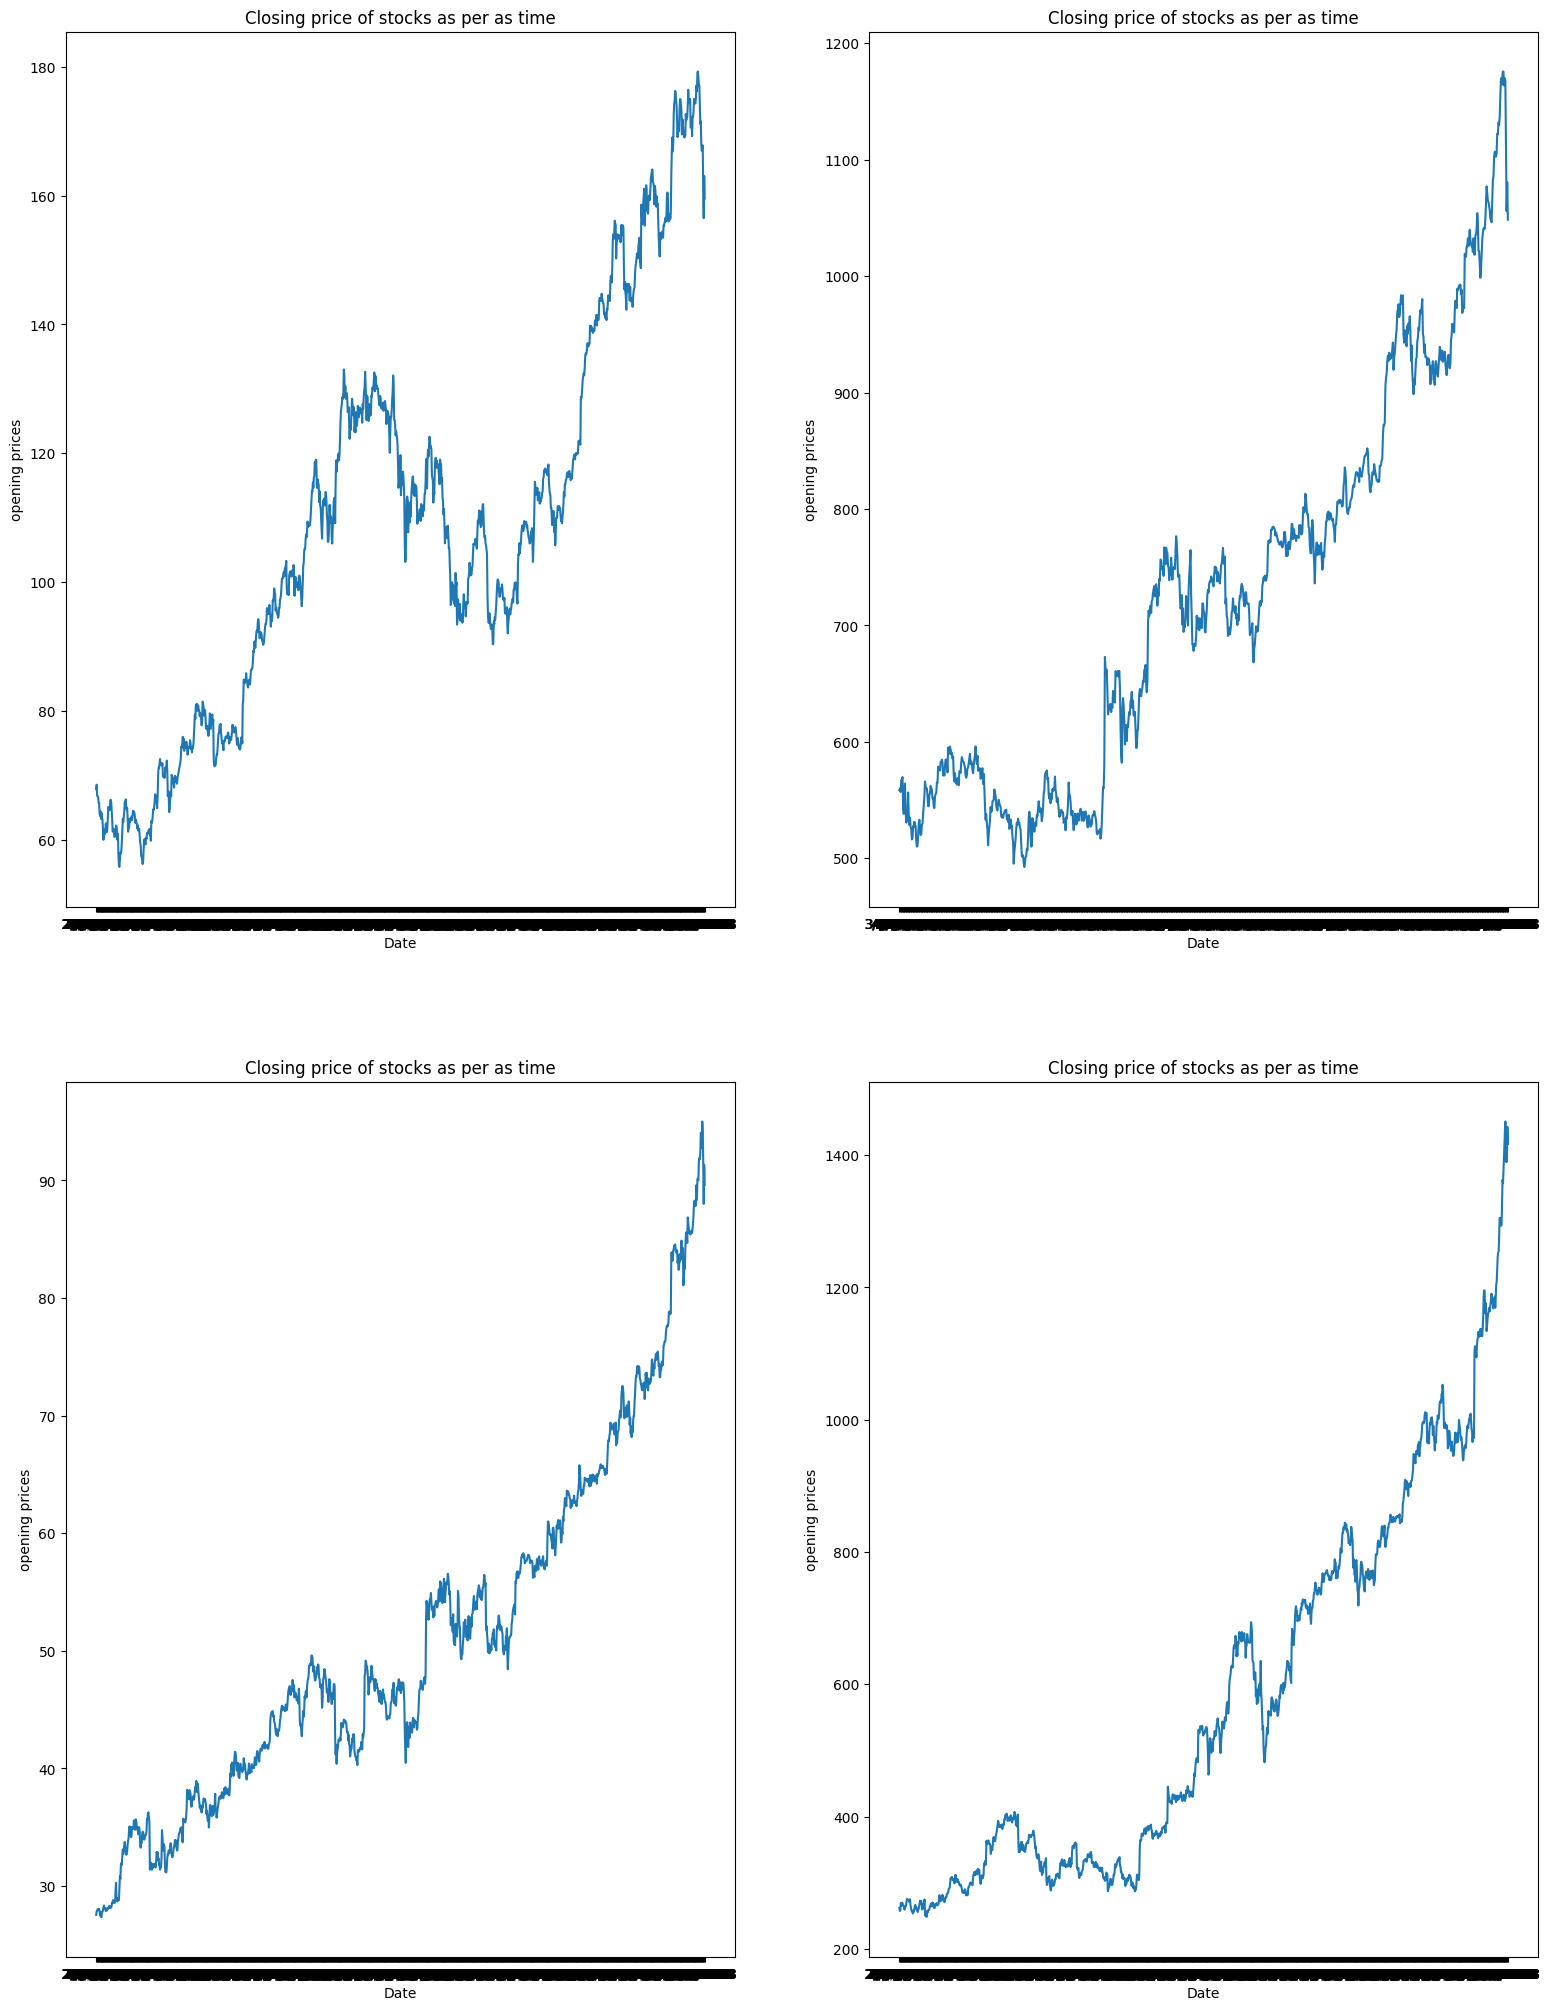

In [ ]:
plt.figure(figsize=(19,25))

for i , company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data["Name"] == company]
    plt.plot(df['date'],df['close'])
    plt.xlabel("Date")
    plt.ylabel("opening prices")
    plt.title("Closing price of stocks as per as time")

## <span style="color: #FF4500;">5.3 - Plotting the  amount of volume been traded everyday..
</span>

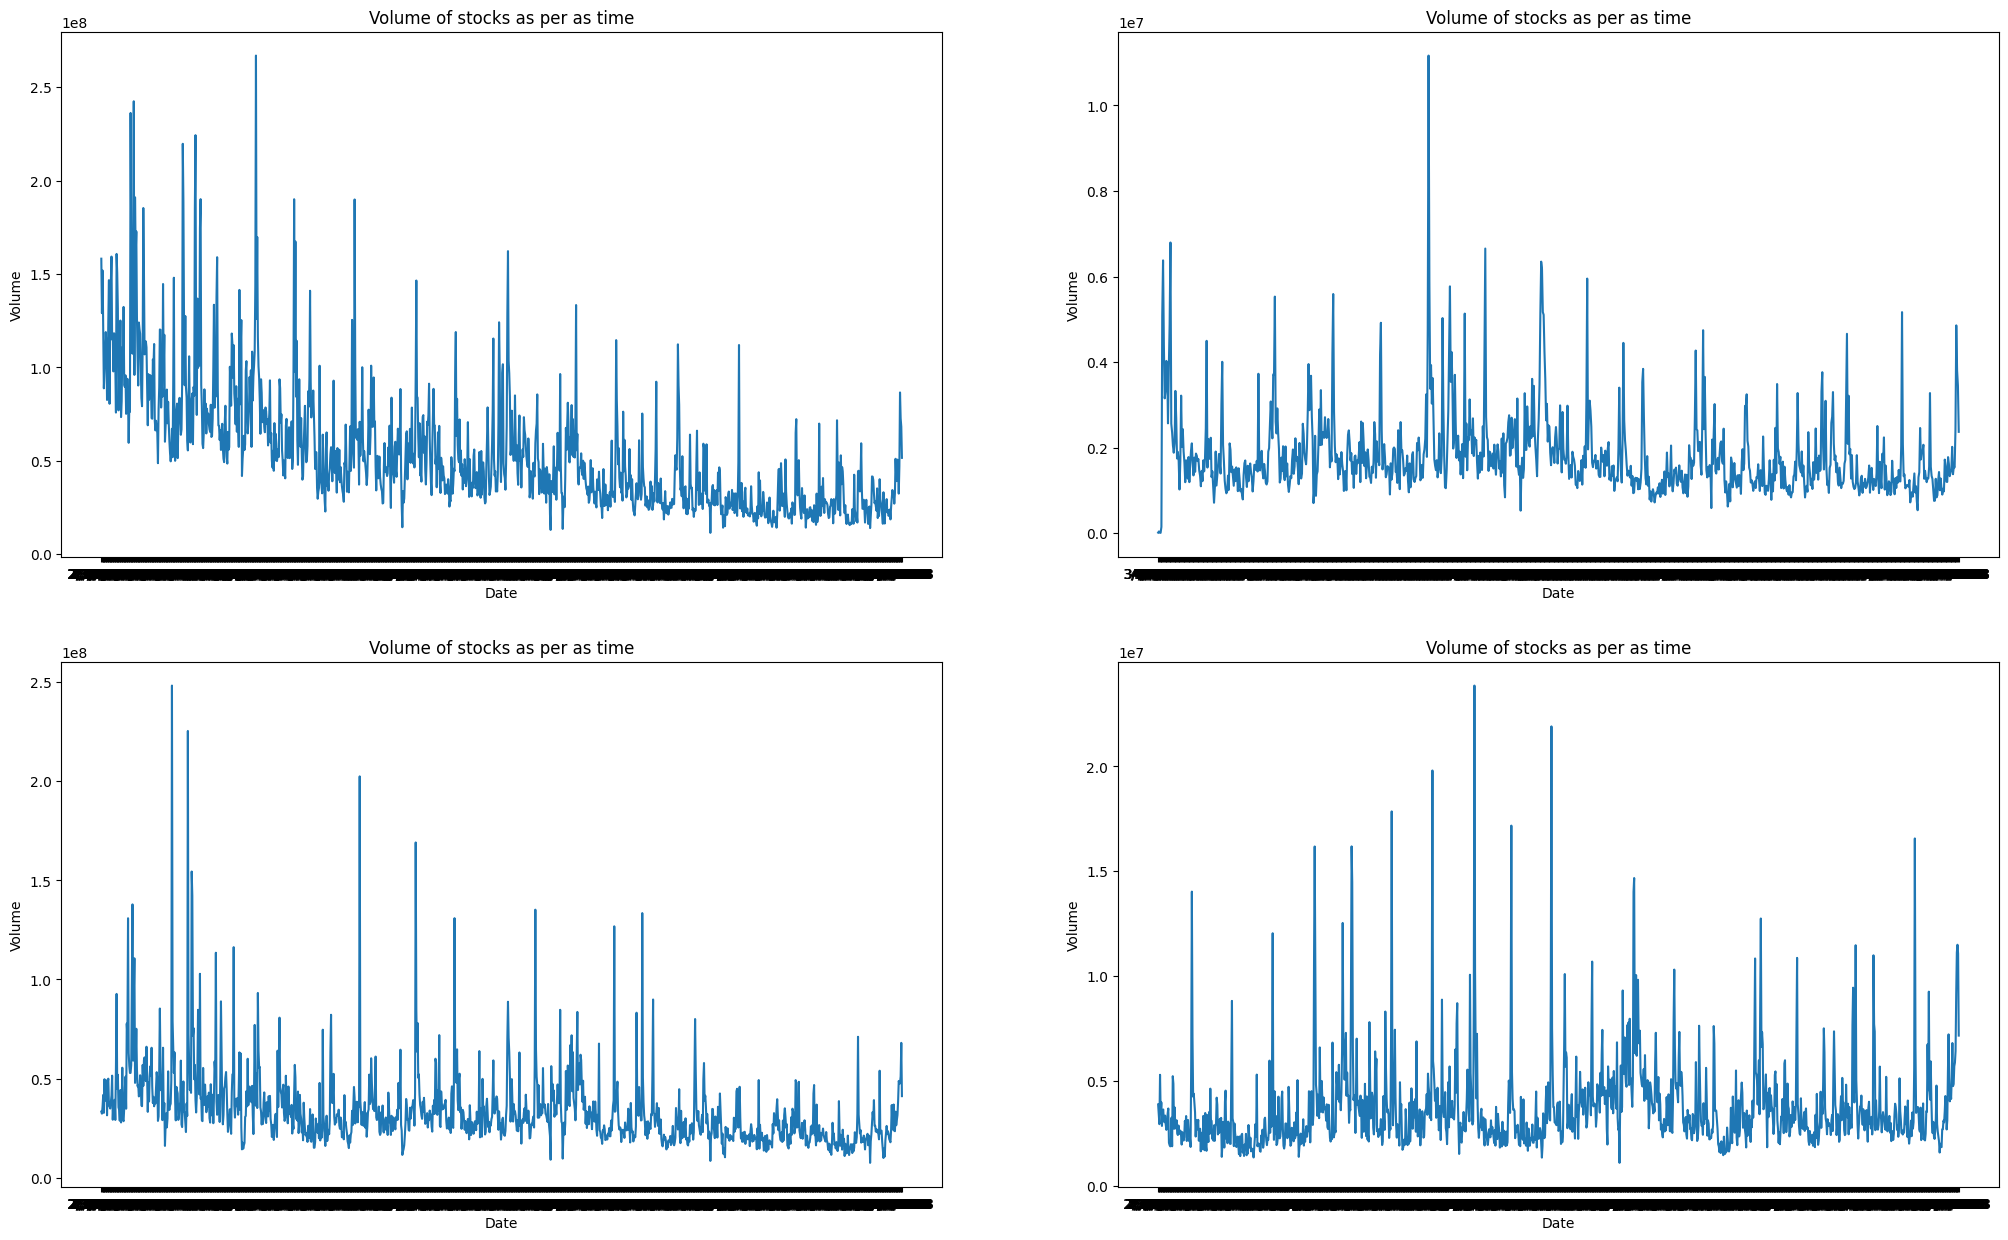

In [ ]:
plt.figure(figsize = (25,15))

for i ,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name'] == company]
    plt.plot(df["date"],df["volume"])
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.title("Volume of stocks as per as time")


## <span style="color: #FF4500;"> -Using plotly to visualize data-

In [ ]:
#importing plotly to visualize data more better.
import plotly.express as px

## <span style="color: orange;"> You can zoom in and out in the graph drawn below.

In [ ]:
for company in (tech_list):
    df = all_data[all_data['Name'] == company]
    graph =  px.line(df , x = "date", y = "volume" , title = "company")
    graph.show()

### <a id="6"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 6 - GOOGLE STOCK ANALYSIS. <br><div>  

In [ ]:
# calculating for the Google stock :

goog = pd.read_csv("/content/Da/GOOG_data.csv")


# Hope google gets impressed by this :)

## <span style="color: #FF4500;"> 6.2 - Exploratory data analysis on the individual "Google" stock

In [ ]:
# Prints the first five columns.
goog.head()

,date,open,high,low,close,volume,Name
0,3/27/2014,568.000,568.00,552.92,558.46,13052,GOOG
1,3/28/2014,561.200,566.43,558.67,559.99,41003,GOOG
2,3/31/2014,566.890,567.00,556.93,556.97,10772,GOOG
3,4/1/2014,558.710,568.45,558.71,567.16,7932,GOOG
4,4/2/2014,565.106,604.83,562.19,567.00,146697,GOOG


In [ ]:
# Difference in terms of percentage and appending it to the existing Df :
goog['1 day % return'] = ((goog['close'] - goog['open'] / goog['close'])) * 100

In [ ]:
# checking whether the column we added exists or not .

goog.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       '1 day % return'],
      dtype='object')

In [ ]:
# checking the appended columns value
goog['1 day % return']

0       55744.291731
1       55898.783925
2       55595.218935
3       56617.489879
4       56600.334039
           ...      
970    116670.435900
971    111089.091645
972    105476.703921
973    107964.943550
974    104754.856701
Name: 1 day % return, Length: 975, dtype: float64

In [ ]:
# Plotting everyday change in prices using plotly.

import plotly.express as px

fig = px.line(goog , x = "date" , y = "1 day % return" , title = 'Changes in prices everyday for the Google stocks')
fig.show()

### <a id="6.3"></a>
## <span style="color: #FF4500;"> 6.3 - Analysing the closing average on monthly basis :

In [ ]:
df2 = goog.copy()
df2.columns
# creating a new dataframe to perform operations...

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       '1 day % return'],
      dtype='object')

In [ ]:
df2 = goog.copy()
df2['date']=pd.to_datetime(df2['date'])
df2.set_index('date',inplace=True)
df2.head()

,open,high,low,close,volume,Name,1 day % return
date,,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,55744.291731
2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,55898.783925
2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,55595.218935
2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,56617.489879
2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,56600.334039


## <span style="color: #FF4500;"> 6.3.1 - Plotting closing value and opening value mean in monthly order :

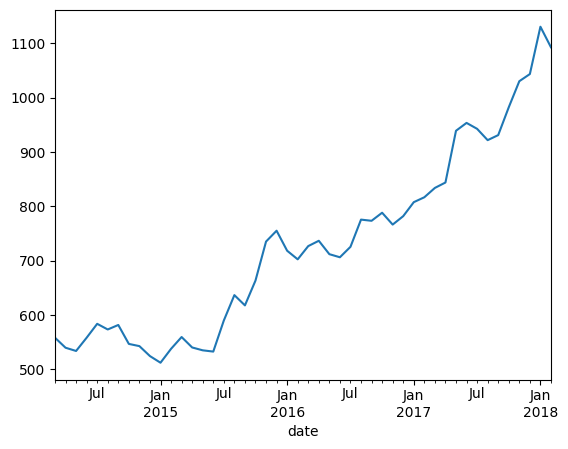

In [ ]:
# plotting closing value in a monthly manner "M" represents the monthly manner:

df2['close'].resample('M').mean().plot()
b = df2['close'].resample('M').mean()

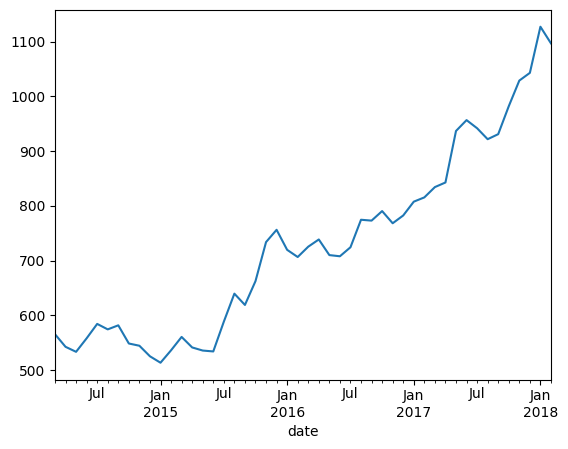

In [ ]:
# Plotting opening value in monthly manner.
df2['open'].resample('M').mean().plot()
a = df2['open'].resample('M').mean()


## <span style="color: #FF4500;"> 6.4 -  Plotting closing and Open mean value in a yearly order

<Axes: xlabel='date'>

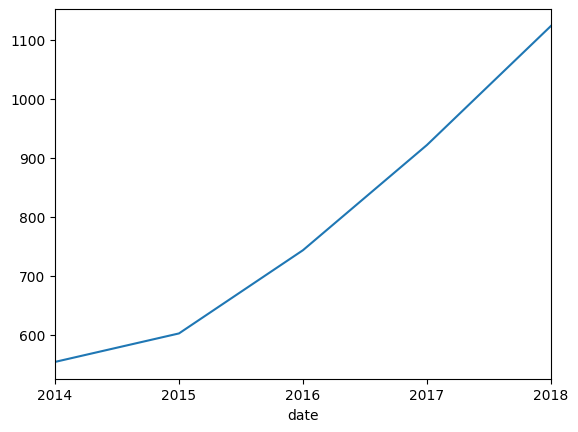

In [ ]:
# the "Y" in resample means plotting in YEARLY order.
df2['close'].resample('Y').mean().plot()


<Axes: xlabel='date'>

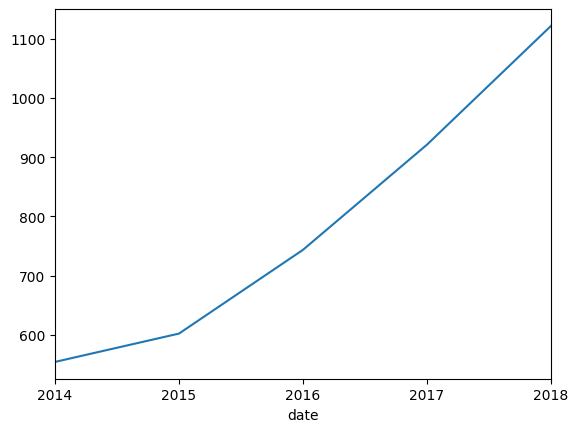

In [ ]:
# Plotting the open value in a Yearly manner.
df2['open'].resample('Y').mean().plot()

<Axes: xlabel='date'>

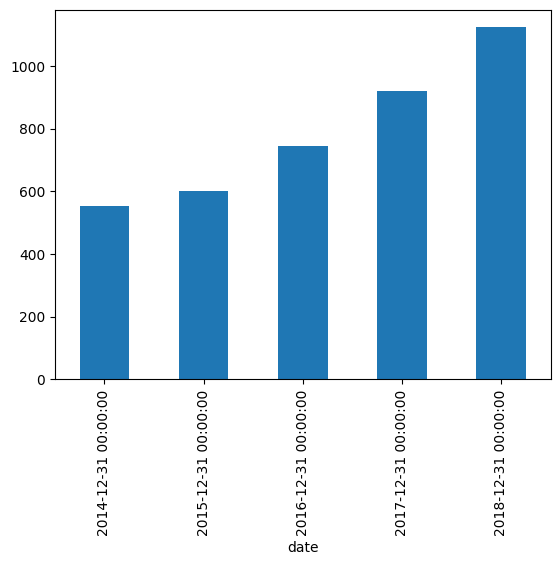

In [ ]:
# plotting a histogram for closing monthly value of mean.


df2['close'].resample('Y').mean().plot(kind = 'bar')


<Axes: xlabel='date'>

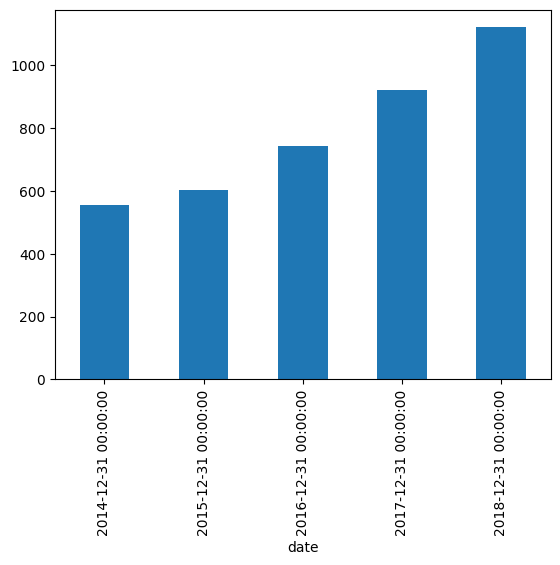

In [ ]:
# plotting a histogram for opening monthly value of mean.


df2['open'].resample('Y').mean().plot(kind = 'bar')


## <span style="color: #FF4500;">Checking the co-relation between all the stocks...

In [ ]:
# Printing first 5 rows of dataframe.
df2.head()

,open,high,low,close,volume,Name,1 day % return
date,,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,55744.291731
2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,55898.783925
2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,55595.218935
2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,56617.489879
2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,56600.334039


## <span style="color: #FF4500;"> Creating individual dataframes for each stocks...

In [ ]:
apple = pd.read_csv("/content/Da/AAPL_data.csv")
apple.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2/11/2013,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2/12/2013,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2/13/2013,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2/14/2013,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [ ]:
microsoft = pd.read_csv("/content/Da/MSFT_data.csv")
microsoft.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,27.35,27.71,27.31,27.55,33318306,MSFT
1,2/11/2013,27.65,27.92,27.50,27.86,32247549,MSFT
2,2/12/2013,27.88,28.00,27.75,27.88,35990829,MSFT
3,2/13/2013,27.93,28.11,27.88,28.03,41715530,MSFT
4,2/14/2013,27.92,28.06,27.87,28.04,32663174,MSFT


In [ ]:
google = pd.read_csv("/content/Da/GOOG_data.csv")
google.head()

,date,open,high,low,close,volume,Name
0,3/27/2014,568.000,568.00,552.92,558.46,13052,GOOG
1,3/28/2014,561.200,566.43,558.67,559.99,41003,GOOG
2,3/31/2014,566.890,567.00,556.93,556.97,10772,GOOG
3,4/1/2014,558.710,568.45,558.71,567.16,7932,GOOG
4,4/2/2014,565.106,604.83,562.19,567.00,146697,GOOG


In [ ]:
amazon = pd.read_csv("/content/Da/AMZN_data.csv")
amazon.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,261.40,265.25,260.555,261.95,3879078,AMZN
1,2/11/2013,263.20,263.25,256.600,257.21,3403403,AMZN
2,2/12/2013,259.19,260.16,257.000,258.70,2938660,AMZN
3,2/13/2013,261.53,269.96,260.300,269.47,5292996,AMZN
4,2/14/2013,267.37,270.65,265.400,269.24,3462780,AMZN


In [ ]:
# creating a dataframe that consists of all the closing values of all stocks :
close = pd.DataFrame()

In [ ]:
# Appending the "close" column of dataframe "Apple" into column "Apple" of dataframe "close"
close['apple'] = apple['close']

# Appending the "close" column of dataframe "amazon" into column "amazon" of dataframe "close"
close['amazon'] = amazon['close']

# Appending the "close" column of dataframe "microsoft" into column "microsoft" of dataframe "close"
close['microsoft'] = microsoft['close']

# Appending the "close" column of dataframe "google" into column "google" of dataframe "close"
close['google'] = google['close']

In [ ]:
# First five rows of dataframe "close"
close.head()

,apple,amazon,microsoft,google
0,67.8542,261.95,27.55,558.46
1,68.5614,257.21,27.86,559.99
2,66.8428,258.70,27.88,556.97
3,66.7156,269.47,28.03,567.16
4,66.6556,269.24,28.04,567.00


### <a id="7"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 7 - CORRELATION & MULTI - VARIATE PLOT.<br><div>  
          
## <span style="color: #FF4500;"> Lets find if there exists any underlying correlations between this stocks and lets plot them together

1. ## <span style="color: #FF4500;">7.1 - Multi-Variate Analysis and plotting of the Various Tech Companies :

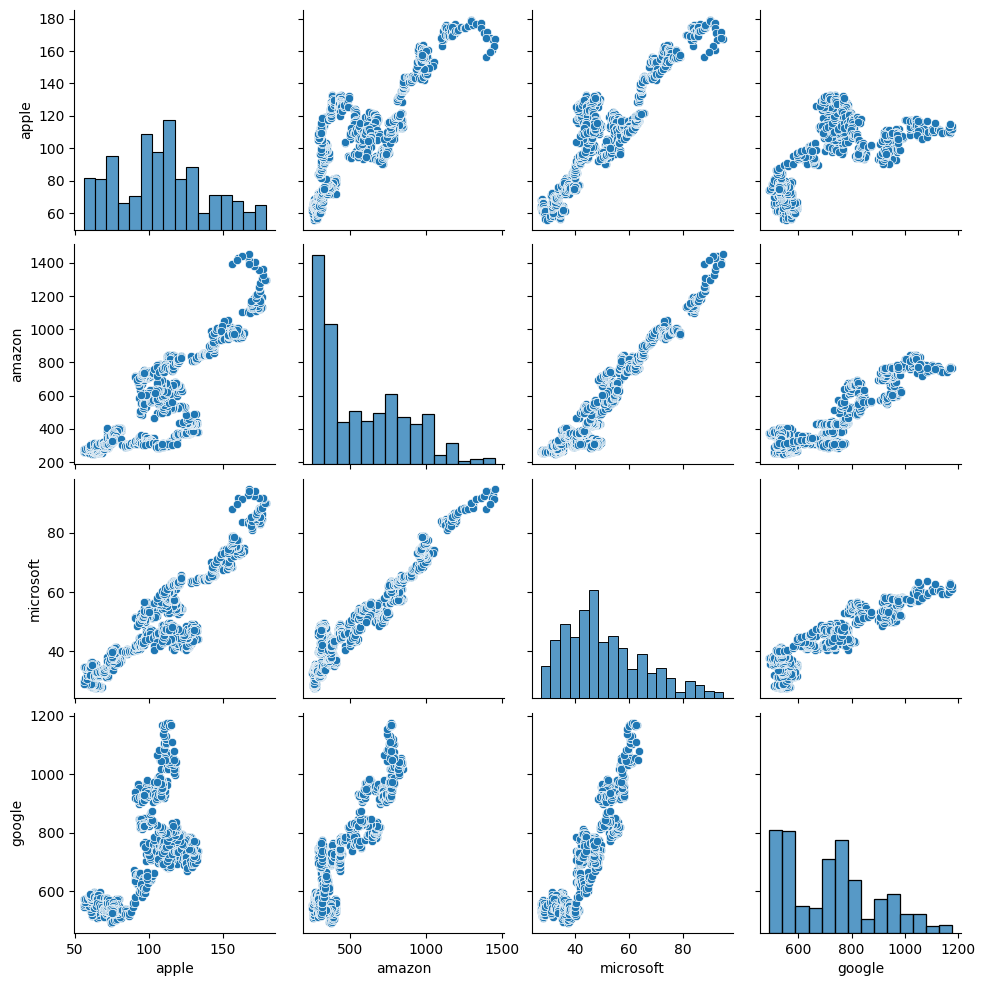

In [ ]:
sns.pairplot(data = close)

<Axes: >

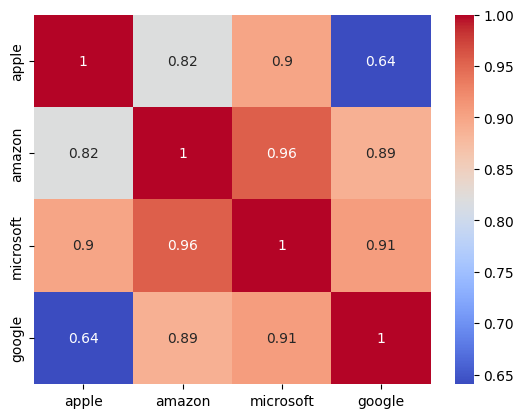

In [ ]:
# Heatmap can be used to show correlation :

sns.heatmap(annot = True , data = close.corr() , cmap = 'coolwarm')

### <a id="8"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 8 - CONCLUSION.<br><div>  

## <span style="color: #FF4500;"> CONCLUSION :  </span>
#### <span style="color: #FF4500;"> From the above Heatmap we canc onclude that the stock prices for Amazon and Microsoft are very well related and close to each other.

## <span style="color: #FF4500;"> 7.2 - Analysing the daily returns for each stock and finding the underlying correlation between the same.

In [ ]:
# Dataframe to plot changes of stock.
ch_data = pd.DataFrame()

In [ ]:
# Percentage of each stock .
ch_data['apple_change'] = ((apple['close'] - apple['open']/apple['close'])*100)
ch_data['amazon_change'] = ((amazon['close'] - amazon['open']/amazon['close'])*100)
ch_data['microsoft_change'] = ((microsoft['close'] - microsoft['open']/microsoft['close'])*100)
ch_data['google_change'] = ((google['close'] - google['open']/google['close'])*100)

In [ ]:
# first five rows on the dataframe.
ch_data.head()


,apple_change,amazon_change,microsoft_change,google_change
0,6685.626325,26095.209964,2655.725953,55744.291731
1,6756.854688,25618.671164,2686.753769,55898.783925
2,6581.798656,25769.810591,2688.000000,55595.218935
3,6571.517131,26849.946525,2703.356761,56617.489879
4,6566.003624,26824.694548,2704.427960,56600.334039


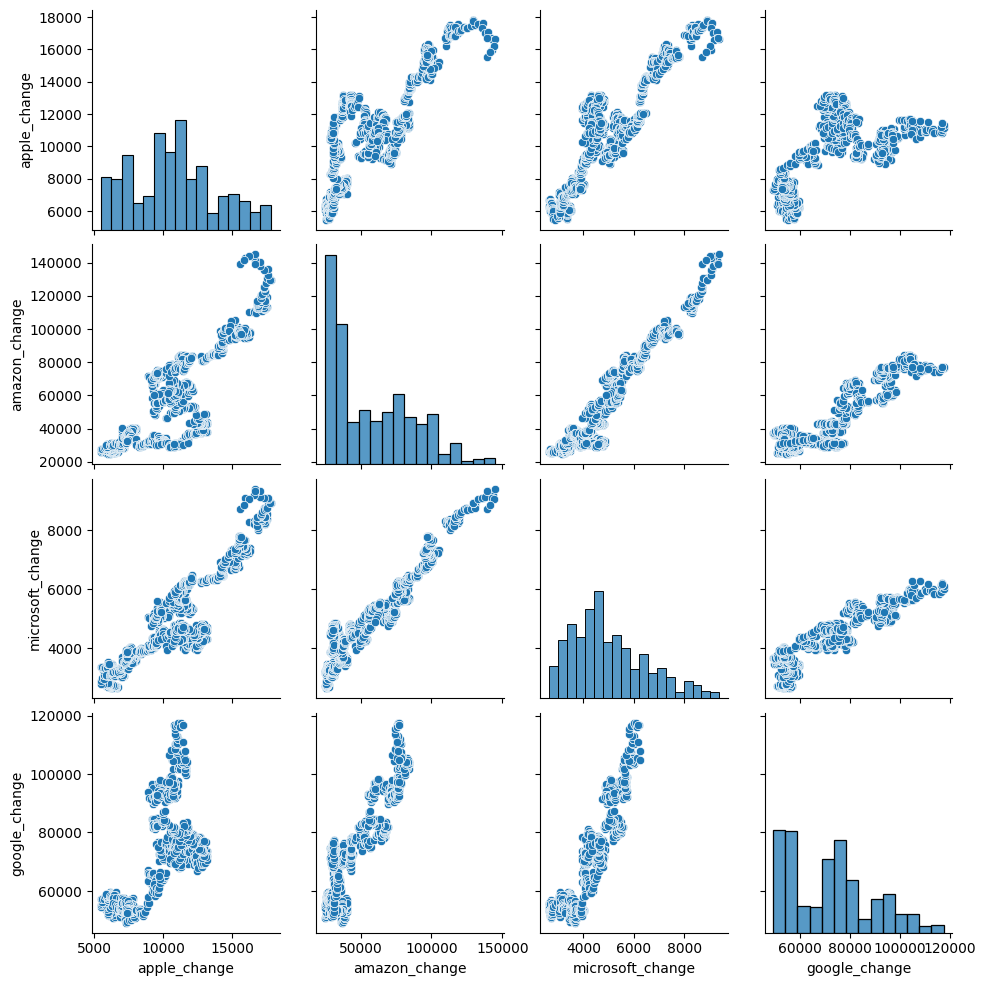

In [ ]:
# Plotting a pairplot.
sns.pairplot(data=ch_data)

<Axes: >

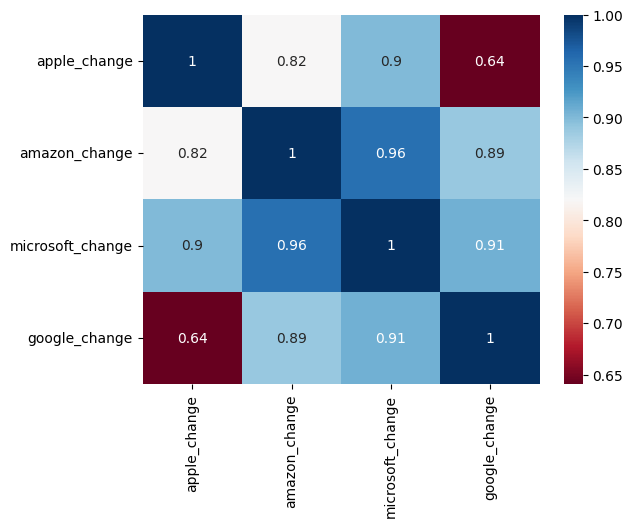

In [ ]:
# Plot a heatmap to show the correlation between changes
sns.heatmap(annot = True , data = ch_data.corr() , cmap = 'RdBu')

# Thank You! 😸

Thank you for exploring my Colab notebook! I hope you found it insightful and informative. If you have any questions, feedback, or would like to connect, feel free to reach out through any of the platforms below:

---

## Professional Contacts 🐈

[![Follow on GitHub](https://img.shields.io/badge/Follow%20on%20GitHub-%23FF4500?style=flat&logo=github&logoColor=black)](https://github.com/Darshan0902) Connect with me on GitHub

[![Follow on Medium](https://img.shields.io/badge/Follow%20on%20Medium-%23FF4500?style=flat&logo=medium&logoColor=white)](https://prabhudarshan09.medium.com/) Follow my Medium articles

[![LinkedIn](https://img.shields.io/badge/Connect%20on%20LinkedIn-%23FF4500?style=flat&logo=linkedin&logoColor=white)](https://linkedin.com/in/darshanprabhu009/) Connect with me on LinkedIn

---

To download and edit the notebook use below button :

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Darshan0902/2024-MACHINE-LEARNING-.-/blob/main/analysis_on_airbnb_listings.ipynb)

## Feel free to stay in touch, and I look forward to connecting with you soon! 😊